# APRENDIZADO

Este notebook serve como material de apoio para os tópicos abordados nos capítulos **Capítulo 18 - Aprendendo com Exemplos**, **Capítulo 19 - Conhecimento na Aprendizagem** e **Capítulo 20 - Aprendendo Modelos Probabilísticos** do livro *Artificial Intelligence: A Modern Approach*.

## Conteúdo

* Machine Learning Overview
* Datasets
* Iris Visualization
* Distance Functions
* k-Nearest Neighbours
* Decision Tree Learner
* Random Forest Learner
* Naive Bayes Learner
* Perceptron
* Learner Evaluation

## VISÃO GERAL DE APRENDIZADO DE MÁQUINA

Neste notebook, aprendemos sobre agentes que podem melhorar seu comportamento por meio do estudo diligente de suas próprias experiências.

Um agente está **aprendendo** se melhora seu desempenho em tarefas futuras após fazer observações sobre o mundo.

Há três tipos de feedback que determinam os três principais tipos de aprendizado:

* **Aprendizado Supervisionado**:

No Aprendizado Supervisionado, o agente observa alguns pares de entrada-saída de exemplo e aprende uma função que faz a correspondência entre entrada e saída.

**Exemplo**: Pense em um agente para classificar imagens contendo gatos ou cachorros. Se fornecermos uma imagem contendo um gato ou um cachorro, este agente deve produzir uma string "gato" ou "cachorro" para essa imagem específica. Para ensinar esse agente, daremos muitos pares entrada-saída como {imagem de gato-"gato"}, {imagem de cachorro-"cachorro"} ao agente. O agente então aprende uma função que faz a correspondência entre uma imagem de entrada e uma dessas strings.

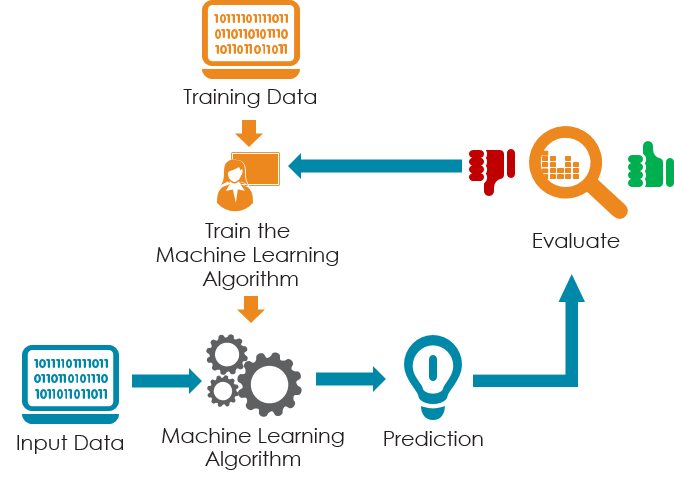

* **Aprendizado Não Supervisionado**:

No Aprendizado Não Supervisionado, o agente aprende padrões nos dados de entrada mesmo sem receber feedback explícito. O tipo mais comum é o **agrupamento (clustering)**: detectar agrupamentos potencialmente úteis de exemplos de entrada.

**Exemplo**: Um agente de táxi poderia desenvolver o conceito de *dias de tráfego bom* e *dias de tráfego ruim* sem nunca receber exemplos rotulados.

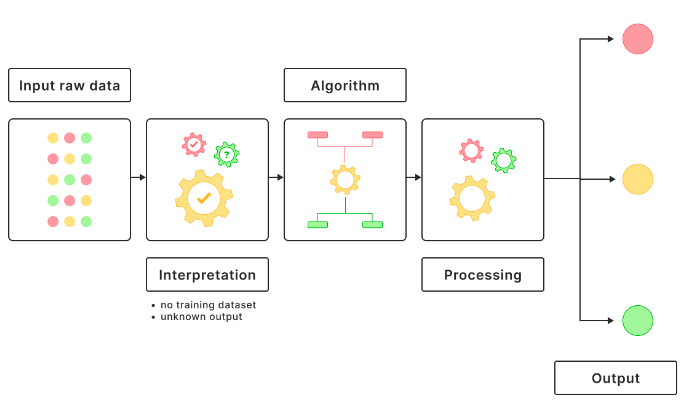

* **Aprendizado por Reforço**:

No Aprendizado por Reforço, o agente aprende a partir de uma série de reforços—recompensas ou punições.

**Exemplo**: Vamos falar sobre um agente para jogar o popular jogo Atari—[Pong](http://www.ponggame.org). Recompensamos o agente com um ponto para cada movimento correto e deduzimos um ponto para cada movimento errado. Eventualmente, o agente descobrirá quais de suas ações, antes do reforço, foram mais responsáveis pelo resultado.

## CONJUNTOS DE DADOS

Nos tutoriais a seguir, utilizaremos uma variedade de conjuntos de dados para demonstrar melhor os pontos fortes e fracos dos algoritmos. Os conjuntos de dados são os seguintes:

* [Iris de Fisher](https://github.com/aimacode/aima-data/blob/a21fc108f52ad551344e947b0eb97df82f8d2b2b/iris.csv): Cada item representa uma flor, com quatro medidas: o comprimento e a largura das sépalas e das pétalas. Cada item/flor é categorizado em uma das três espécies: Setosa, Versicolor e Virginica.

* [Zoo](https://github.com/aimacode/aima-data/blob/a21fc108f52ad551344e947b0eb97df82f8d2b2b/zoo.csv): Este conjunto de dados contém diferentes animais e sua classificação como "mamífero", "peixe", etc. O novo animal que queremos classificar possui as seguintes características: 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1 (não se preocupe com o significado dessas características).

* **Decisão de Restaurante**: Um conjunto de dados hipotético que ajuda a determinar se um grupo deve ir a um restaurante com base em uma série de fatores, como: se a comida é boa, se o tempo de espera é razoável, se há alternativas próximas e se o restaurante é recomendado por amigos. Este conjunto é usado para treinar modelos em problemas de classificação baseados em múltiplos critérios de decisão.

Para facilitar o uso dos conjuntos de dados, escrevemos uma classe chamada `DataSet` em `learning.py` ou uso do *pandas*. Os tutoriais encontrados aqui fazem uso dessa classe.

Vamos dar uma olhada em como ela funciona antes de começarmos com os algoritmos.

### Introdução

Muitos dos conjuntos de dados com os quais trabalharemos são arquivos no formato `.csv` (embora outros formatos também sejam suportados). Temos uma coleção de conjuntos de dados prontos para uso [no aima-data](https://github.com/aimacode/aima-data/tree/a21fc108f52ad551344e947b0eb97df82f8d2b2b) e na pasta **data** da disciplina, que inclui os conjuntos necessários para os exemplos e exercícios abordados. Dois exemplos são os conjuntos de dados mencionados acima (*iris.csv* e *zoo.csv*). 

Há também muitos conjuntos de dados disponíveis online, e um bom repositório para encontrá-los é o [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html).

Em arquivos como esses, cada linha corresponde a um item/medição. Cada valor individual em uma linha representa uma *característica* (feature), e geralmente há um valor que indica a *classe* do item.



## FUNÇÕES DE DISTÂNCIA

Em muitos algoritmos (como o algoritmo *k-Nearest Neighbors*), há a necessidade de comparar itens para determinar o quão *similares* ou *próximos* eles são. Para isso, temos várias funções à nossa disposição. Abaixo estão as funções implementadas no módulo:

### Distância de Manhattan (`manhattan_distance`)

Uma das funções de distância mais simples. Ela calcula a diferença entre as coordenadas/características de dois itens. Para entender como funciona, imagine uma grade 2D com coordenadas *x* e *y*. Nessa grade, temos dois itens posicionados nos quadrados `(1,2)` e `(3,4)`. A diferença entre suas coordenadas é `3-1=2` e `4-2=2`. Se somarmos essas diferenças, obtemos `4`. Isso significa que, para ir de `(1,2)` para `(3,4)`, precisamos de quatro movimentos: dois para a direita e dois para cima. A função funciona de forma semelhante para grades n-dimensionais.

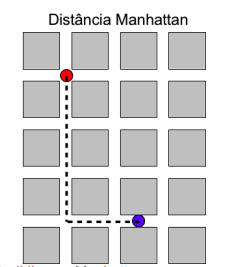

In [ ]:
def manhattan_distance(X, Y):
    return sum([abs(x - y) for x, y in zip(X, Y)])


distance = manhattan_distance([1,2], [3,4])
print("Manhattan Distance between (1,2) and (3,4) is", distance)

### Distância Euclidiana (`euclidean_distance`)

Provavelmente a função de distância mais popular. Ela retorna a raiz quadrada da soma das diferenças quadradas entre os elementos individuais de dois itens.

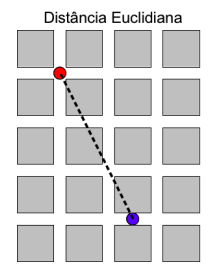

In [ ]:
import math
def euclidean_distance(X, Y):
    return math.sqrt(sum([(x - y)**2 for x, y in zip(X,Y)]))


distance = euclidean_distance([1,2], [3,4])
print("Euclidean Distance between (1,2) and (3,4) is", distance)

### Distância de Hamming (`hamming_distance`)

Esta função conta o número de diferenças entre elementos individuais de dois itens. Por exemplo, se tivermos duas strings binárias "111" e "011", a função retornará 1, pois as duas strings diferem apenas no primeiro elemento. A função também funciona da mesma forma para strings não binárias.

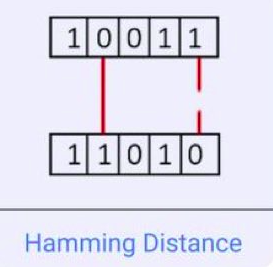

In [ ]:
def hamming_distance(X, Y):
    return sum(x != y for x, y in zip(X, Y))


distance = hamming_distance(['a','b','c'], ['a','b','b'])
print("Hamming Distance between 'abc' and 'abb' is", distance)

### Erro Booleano Médio (`mean_boolean_error`)

Para calcular essa distância, determinamos a razão entre os elementos diferentes e o total de elementos de dois itens. Por exemplo, se os dois itens forem `(1,2,3)` e `(1,4,5)`, a razão entre os elementos diferentes e o total é 2/3, já que eles diferem em dois de três elementos.

In [ ]:
def mean_boolean_error(X, Y):
    return mean(int(x != y) for x, y in zip(X, Y))


distance = mean_boolean_error([1,2,3], [1,4,5])
print("Mean Boolean Error Distance between (1,2,3) and (1,4,5) is", distance)

### Erro Médio (`mean_error`)

Essa função calcula a diferença média entre os elementos individuais de dois itens. Por exemplo, se os dois itens forem `(1,0,5)` e `(3,10,5)`, a distância de erro será `(3-1) + (10-0) + (5-5) = 2 + 10 + 0 = 12`. Assim, o erro médio será `12/3 = 4`.

In [ ]:
def mean_error(X, Y):
    return mean([abs(x - y) for x, y in zip(X, Y)])


distance = mean_error([1,0,5], [3,10,5])
print("Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

### Erro Quadrático Médio (`ms_error`)

É muito semelhante ao `Erro Médio`, mas, em vez de calcular apenas a diferença entre os elementos, calculamos o *quadrado* das diferenças.

In [ ]:
def ms_error(X, Y):
    return mean([(x - y)**2 for x, y in zip(X, Y)])


distance = ms_error([1,0,5], [3,10,5])
print("Mean Square Distance between (1,0,5) and (3,10,5) is", distance)

### Raiz do Erro Quadrático Médio (`rms_error`)

É a raiz quadrada do `Erro Quadrático Médio`.

In [ ]:
def rms_error(X, Y):
    return math.sqrt(ms_error(X, Y))


distance = rms_error([1,0,5], [3,10,5])
print("Root of Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

## K-NEAREST NEIGHBOURS CLASSIFIER

### Visão Geral

O algoritmo *k-Nearest Neighbors* (kNN) é um método não paramétrico usado para classificação e regressão. Vamos utilizá-lo para classificar flores do conjunto de dados Iris. Saiba mais sobre o kNN em [Scholarpedia](http://www.scholarpedia.org/article/K-nearest_neighbor).

![kNN plot](images/knn_plot.png)

Vamos entender como o kNN funciona com um exemplo simples mostrado no gráfico acima.

Temos as coordenadas (chamadas de **características** em aprendizado de máquina) de uma estrela vermelha, e precisamos prever sua classe usando o algoritmo kNN. Nesse algoritmo, o valor de **k** é arbitrário. **k** é um dos **hiperparâmetros** do algoritmo kNN. Escolhemos esse número com base no nosso conjunto de dados, e essa escolha é conhecida como **ajuste/otimização de hiperparâmetro**. Vamos aprender mais sobre isso em tópicos futuros.

Vamos definir **k = 3**. Isso significa que precisamos encontrar os 3 vizinhos mais próximos dessa estrela vermelha e classificá-la na classe majoritária. Observe o círculo menor, que contém três pontos além do **ponto de teste** (estrela vermelha). Como há dois pontos violetas, que formam a maioria, prevemos a classe da estrela vermelha como **violeta - Classe B**.

Da mesma forma, se definirmos **k = 5**, você pode observar que há três pontos amarelos, que formam a maioria. Assim, classificamos nosso ponto de teste como **amarelo - Classe A**.

Em tarefas práticas, iteramos por vários valores de k (como [1, 3, 5, 10, 20, 50, 100]), analisamos o desempenho e selecionamos o melhor valor.

### Implementation

Below follows the implementation of the kNN algorithm:

In [ ]:
psource(NearestNeighborLearner)

A função recebe como entrada um conjunto de dados e o valor de **k** (o valor padrão é 1) e retorna uma função que podemos usar posteriormente para classificar um novo item.

Para isso, a função utiliza uma *heap-queue* (fila de prioridade), onde os itens do conjunto de dados são ordenados de acordo com sua distância do *example* (o item a ser classificado). Em seguida, selecionamos os **k** menores elementos dessa *heap-queue* e determinamos a classe majoritária. Classificamos o item na classe majoritária encontrada.

### K-Nearest Neighbors (KNN) Classification com scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
import numpy as np
import pandas as pd

df = pd.read_csv("./aima-data/iris.csv", header=None)
# Split the data into features (X) and target (y)
X = df.drop([4], axis=1)
y = df[4]
print(X)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
input_data = np.array([5.1, 3.0, 1.1, 0.1]).reshape(1, -1)
print(knn.predict(input_data))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Carregar o dataset
df = pd.read_csv("./aima-data/iris.csv", header=None)

# Dividir os dados em features (X) e alvo (y)
X = df.drop([4], axis=1)
y = df[4]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Avaliar o modelo com o conjunto de teste
score = knn.score(X_test, y_test)
print(f"Acurácia no conjunto de teste: {score:.2f}")

# Fazer uma previsão com dados de entrada
input_data = np.array([5.1, 3.0, 1.1, 0.1]).reshape(1, -1)
prediction = knn.predict(input_data)
print(f"Classe prevista para os dados de entrada: {prediction[0]}")


## APRENDIZADO POR ÁRVORE DE DECISÃO

### Visão Geral

#### Árvores de Decisão
Uma árvore de decisão é um fluxograma que utiliza uma estrutura de decisões e suas possíveis consequências para realizar classificações. Em cada nó interno (não folha) da árvore, um atributo da entrada é testado, e o ramo correspondente que leva ao nó filho é selecionado. No nó folha, a entrada é classificada com base no rótulo de classe desse nó folha. Os caminhos da raiz às folhas representam regras de classificação que determinam os rótulos de classe atribuídos aos nós folha.

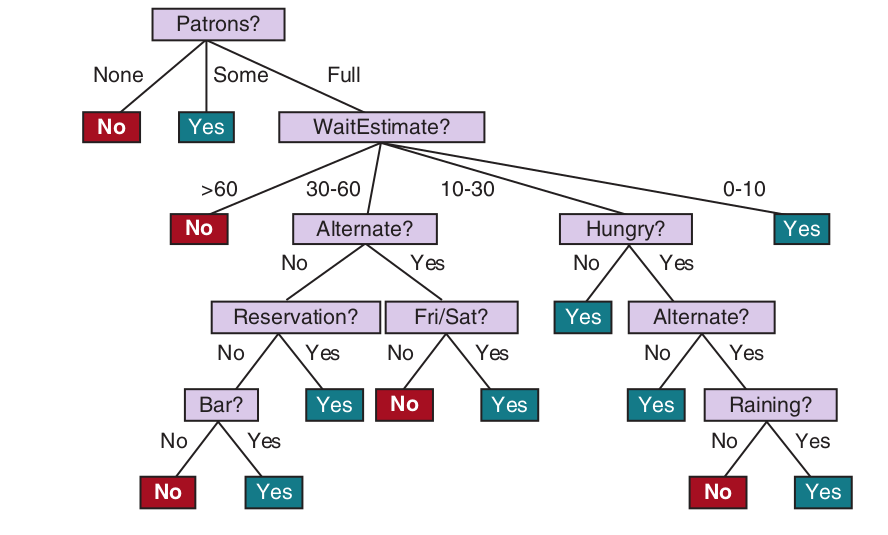

#### Aprendizado por Árvore de Decisão
O aprendizado por árvore de decisão consiste na construção de uma árvore de decisão a partir de dados de treinamento rotulados por classe. Os dados são esperados como uma tupla, na qual cada registro da tupla é um atributo usado para classificação. A árvore de decisão é construída de cima para baixo, escolhendo-se uma variável em cada etapa que melhor divide o conjunto de itens. Existem diferentes métricas para medir a "melhor divisão". Essas métricas geralmente avaliam a homogeneidade da variável alvo dentro dos subconjuntos.

# Critérios de Divisão: Gini Impurity

O **Gini Impurity** é uma métrica usada para avaliar a qualidade de uma divisão em uma árvore de decisão. Ele mede a probabilidade de uma amostra ser classificada incorretamente se for rotulada aleatoriamente com base na distribuição das classes em um nó.

## Fórmula
A fórmula para calcular o Gini Impurity em um nó é:

$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$

Onde:
- $ n $: Número de classes possíveis.
- $( p_i )$: Proporção de instâncias que pertencem à classe $ i $ no nó.

## Interpretação
- O valor do Gini Impurity varia de **0** a **1**:
  - **0**: Impureza mínima (nó puro, todas as instâncias pertencem à mesma classe).
  - **1**: Impureza máxima (distribuição uniforme entre as classes).

## Exemplo 1: Nó com uma única classe
Se todas as instâncias em um nó pertencem à mesma classe, a impureza de Gini será **0**.

- Suponha que o nó contenha 100 instâncias, todas da classe "A".
- $ p_A = 1.0 $, $ p_B = 0.0 $ (nenhuma instância na classe "B").
- $ Gini = 1 - (1^2 + 0^2) = 1 - 1 = 0 $.

## Exemplo 2: Nó com duas classes
Se o nó contém instâncias distribuídas igualmente entre duas classes, a impureza será maior.

- Suponha que o nó contenha 50 instâncias de "A" e 50 de "B".
- $ p_A = 0.5 $, $ p_B = 0.5 $.
- $ Gini = 1 - (0.5^2 + 0.5^2) = 1 - (0.25 + 0.25) = 1 - 0.5 = 0.5 $.

## Exemplo 3: Nó com classes desbalanceadas
Se o nó contém 90 instâncias de "A" e 10 de "B":

- $ p_A = 0.9 $, $ p_B = 0.1 $.
- $ Gini = 1 - (0.9^2 + 0.1^2) = 1 - (0.81 + 0.01) = 1 - 0.82 = 0.18 $.

## Aplicação no Algoritmo
Durante o treinamento de uma árvore de decisão:
1. Para cada divisão candidata, calcula-se o Gini Impurity de cada subgrupo (nós filhos).
2. O **Gini Impurity ponderado** é calculado como a média ponderada do Gini dos subgrupos, usando o número de instâncias em cada nó como peso.
3. A divisão que minimiza o Gini Impurity ponderado é escolhida.

### Exemplo de Cálculo Ponderado
Imagine dividir um nó com 100 instâncias em dois subgrupos:
- Subgrupo 1: 40 instâncias ($ p_A = 0.8, p_B = 0.2 $).
- Subgrupo 2: 60 instâncias ($ p_A = 0.5, p_B = 0.5 $).

**Gini Subgrupo 1**:
$$
Gini_1 = 1 - (0.8^2 + 0.2^2) = 1 - (0.64 + 0.04) = 0.32
$$

**Gini Subgrupo 2**:
$$
Gini_2 = 1 - (0.5^2 + 0.5^2) = 1 - (0.25 + 0.25) = 0.5
$$

**Gini Ponderado**:
$$
Gini_{ponderado} = \frac{40}{100} \cdot 0.32 + \frac{60}{100} \cdot 0.5 = 0.4 \cdot 0.32 + 0.6 \cdot 0.5 = 0.128 + 0.3 = 0.428
$$

A divisão que resulta no menor Gini Ponderado será escolhida.

## Resumo
O Gini Impurity é uma métrica prática e eficiente para avaliar divisões, e sua simplicidade o torna amplamente utilizado em árvores de decisão como o algoritmo CART.

---


# Critérios de Divisão: Entropia e Information Gain

## Entropia
A **Entropia** é uma métrica que mede o grau de desordem ou incerteza em um conjunto de dados. É usada para avaliar o quão puro (homogêneo) é um nó em uma árvore de decisão.

### Fórmula da Entropia
A entropia é definida como:

$
H(S) = - \sum_{i=1}^{n} p_i \cdot \log_2(p_i)
$

Onde:
- $ n $: Número de classes possíveis.
- $ p_i $: Proporção de instâncias que pertencem à classe $ i $ no conjunto de dados $ S $.

### Interpretação
- **Entropia = 0**: O conjunto é homogêneo (todas as instâncias pertencem à mesma classe).
- **Entropia máxima**: O conjunto é perfeitamente desordenado (todas as classes estão distribuídas igualmente).

### Exemplo 1: Conjunto puro
Se todas as instâncias pertencem à mesma classe:
- $ p_A = 1.0 $, $ p_B = 0.0 $.
- $ H(S) = - (1 \cdot \log_2(1) + 0 \cdot \log_2(0)) = 0 $.

### Exemplo 2: Conjunto uniforme
Se as instâncias estão distribuídas igualmente entre duas classes:
- $ p_A = 0.5 $, $ p_B = 0.5 $.
- $ H(S) = - (0.5 \cdot \log_2(0.5) + 0.5 \cdot \log_2(0.5)) $.
- $ H(S) = - (0.5 \cdot -1 + 0.5 \cdot -1) = 1 $.

---

## Information Gain
O **Information Gain (IG)** mede a redução na entropia causada por uma divisão do conjunto de dados. Ele é usado para selecionar o atributo que melhor separa os dados em diferentes classes.

### Fórmula do Information Gain
$
IG(S, A) = H(S) - \sum_{i=1}^{k} \frac{|S_i|}{|S|} \cdot H(S_i)
$

Onde:
- $ H(S) $: Entropia do conjunto original.
- $ A $: Atributo usado para a divisão.
- $ k $: Número de subgrupos resultantes da divisão.
- $ S_i $: Subconjunto de $ S $ resultante da divisão.
- $ \frac{|S_i|}{|S|} $: Proporção de instâncias no subconjunto $ S_i $.

### Passos para Calcular o IG
1. Calcule a entropia do conjunto original.
2. Divida o conjunto com base no atributo escolhido.
3. Calcule a entropia ponderada dos subgrupos resultantes.
4. Subtraia a entropia ponderada do conjunto original.

---

### Exemplo de Cálculo
#### Dados Originais:
# Tabela Completa de Dados

| **ID** | **Tempo**    | **Temperatura** | **Umidade** | **Vento**   | **Classe (Jogar?)** |
|--------|--------------|-----------------|-------------|-------------|---------------------|
| 1      | Ensolarado   | Quente          | Alta        | Fraco       | Não                 |
| 2      | Ensolarado   | Quente          | Alta        | Forte       | Não                 |
| 3      | Nublado      | Quente          | Alta        | Fraco       | Sim                 |
| 4      | Chuvoso      | Ameno           | Alta        | Fraco       | Sim                 |
| 5      | Chuvoso      | Frio            | Normal      | Fraco       | Sim                 |
| 6      | Chuvoso      | Frio            | Normal      | Forte       | Não                 |
| 7      | Nublado      | Frio            | Normal      | Forte       | Sim                 |
| 8      | Ensolarado   | Ameno           | Alta        | Fraco       | Não                 |
| 9      | Ensolarado   | Frio            | Normal      | Fraco       | Sim                 |
| 10     | Chuvoso      | Ameno           | Normal      | Fraco       | Sim                 |
| 11     | Ensolarado   | Ameno           | Normal      | Forte       | Sim                 |
| 12     | Nublado      | Ameno           | Alta        | Forte       | Sim                 |
| 13     | Nublado      | Quente          | Normal      | Fraco       | Sim                 |
| 14     | Chuvoso      | Ameno           | Alta        | Forte       | Não                 |

---

# Atributos Disponíveis

1. **Tempo**: Ensolarado, Nublado, Chuvoso.
2. **Temperatura**: Quente, Ameno, Frio.
3. **Umidade**: Alta, Normal.
4. **Vento**: Fraco, Forte.
5. **Classe (Jogar?)**: Sim, Não.


Essa tabela serve como base para os cálculos de todos os critérios de divisão.

| Classe | Frequência |
|--------|------------|
| Sim    | 9          |
| Não    | 5          |

#### Passo 1: Calcular a Entropia Inicial
$
H(S) = - \left( \frac{9}{14} \cdot \log_2\left(\frac{9}{14}\right) + \frac{5}{14} \cdot \log_2\left(\frac{5}{14}\right) \right)
$

$
H(S) = - (0.643 \cdot -0.643 + 0.357 \cdot -1.485) = 0.94
$

#### Passo 2: Divisão do Atributo "Tempo"
| Tempo  | Sim | Não |
|--------|-----|-----|
| Ensolarado | 2   | 3   |
| Nublado    | 4   | 0   |
| Chuvoso    | 3   | 2   |

#### Passo 3: Calcular a Entropia Ponderada
1. **Ensolarado**:
$
H(Ensolarado) = - \left( \frac{2}{5} \cdot \log_2\left(\frac{2}{5}\right) + \frac{3}{5} \cdot \log_2\left(\frac{3}{5}\right) \right) = 0.971
$

2. **Nublado**:
$
H(Nublado) = - \left( \frac{4}{4} \cdot \log_2\left(\frac{4}{4}\right) \right) = 0
$

3. **Chuvoso**:
$
H(Chuvoso) = - \left( \frac{3}{5} \cdot \log_2\left(\frac{3}{5}\right) + \frac{2}{5} \cdot \log_2\left(\frac{2}{5}\right) \right) = 0.971
$

Ponderação:
$
H(Split) = \frac{5}{14} \cdot 0.971 + \frac{4}{14} \cdot 0 + \frac{5}{14} \cdot 0.971 = 0.693
$

#### Passo 4: Calcular o Information Gain
$
IG(S, Tempo) = H(S) - H(Split) = 0.94 - 0.693 = 0.247
$

---

## Resumo
- **Entropia** mede a desordem dos dados.
- **Information Gain** mede a redução na desordem após uma divisão.
- A divisão com maior Information Gain é escolhida para construir a árvore de decisão.

---


#### Pseudocódigo

Você pode visualizar o pseudocódigo executando a célula abaixo:

In [ ]:
pseudocode("Decision Tree Learning")

### Implementação de Árvore de Decisão para Classificação dados numéricos

In [ ]:
# Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Carregar o conjunto de dados (Iris)
data = load_iris()
X = data.data  # Atributos
y = data.target  # Classes

# 2. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 4. Fazer previsões
y_pred = model.predict(X_test)

# 5. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# 6. Visualizar a Árvore de Decisão
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()



### **Estrutura de um Nó**
Cada nó na árvore contém as seguintes informações:
1. **Condição**: A regra de divisão usada para separar os dados.
   - Exemplo: `petal length (cm) <= 2.45`.
2. **Gini**: O índice de Gini do nó, que mede a impureza (variação) das classes.
   - Quanto menor o valor de Gini, mais homogêneo é o nó.
   - \( Gini = 0 \): Todas as amostras pertencem a uma única classe.
3. **Samples**: O número total de amostras que chegaram a esse nó.
   - Representa quantos dados estão sendo avaliados.
4. **Value**: A distribuição das amostras entre as classes no nó.
   - Exemplo: `[31, 37, 37]` significa que há 31 amostras da classe 1, 37 da classe 2 e 37 da classe 3.
5. **Class**: A classe majoritária naquele nó.
   - É a previsão final para amostras que chegam a esse nó.

### Implementação de Árvore de Decisão para Classificação dados categóricos

In [ ]:
# Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

# 1. Carregar o conjunto de dados (Iris)
# Carregar o dataset
df = pd.read_csv("./data/DecisaRestaurante.csv",sep=',')

# 2. Converter as colunas categóricas para numéricas
df_encoded = pd.get_dummies(df, columns=df.columns[:-1])  # Excluímos a coluna "Esperar" para não codificar o alvo.
print(df_encoded)
# Separar os dados em X (atributos) e y (alvo)
X = df_encoded.drop(columns=['Esperar'], axis=1)  # Remover a coluna alvo codificada.
y = df['Esperar'].map({'Sim': 1, 'Não': 0})  # Mapear "Sim" para 1 e "Não" para 0.

# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 5. Avaliar o modelo
accuracy = model.score(X_test, y_test)
print(f"Acurácia do modelo: {accuracy:.2f}")

# 6. Visualizar a Árvore de Decisão
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=["Não", "Sim"], filled=True)
plt.show()



### Fazer uma predição



In [ ]:
# 5. Fazer uma predição
# Exemplo de nova entrada para prever
nova_entrada = {
    "Alternativa": "Sim",
    "Bar": "Sim",
    "Sex_Sab": "Sim",
    "Fome": "Sim",
    "Pessoas": "Cheio",
    "Preco": "Moderado",
    "Chuva": "Sim",
    "Reserva": "Não",
    "Tipo": "Tailandês",
    "Estimativa": "30-60"
}

# Transformar a nova entrada em formato codificado
nova_entrada_df = pd.DataFrame([nova_entrada])
nova_entrada_encoded = pd.get_dummies(nova_entrada_df).reindex(columns=X.columns, fill_value=0)

# Fazer a previsão
predicao = model.predict(nova_entrada_encoded)

# Exibir o resultado
resultado = "Sim" if predicao[0] == 1 else "Não"
print(f"A previsão para a nova entrada é: {resultado}")

## RANDOM FOREST LEARNER

### Overview

![random_forest.png](images/random_forest.png)   
Image via [src](https://cdn-images-1.medium.com/max/800/0*tG-IWcxL1jg7RkT0.png)

#### Random Forest

Como o nome do algoritmo e a imagem acima sugerem, este algoritmo cria uma floresta com um número de árvores. Quanto maior o número de árvores, mais robusta será a floresta. Da mesma forma, no algoritmo de Random Forest, quanto maior o número de árvores na floresta, maior será a precisão do resultado. A principal diferença entre o Random Forest e as árvores de decisão é que a escolha do nó raiz e a divisão dos nós de características serão feitas de forma aleatória.

Vamos ver como o algoritmo Random Forest funciona:  
O algoritmo Random Forest funciona em duas etapas: primeiro, a criação da floresta aleatória e, depois, a previsão. Vamos primeiro entender a criação:

O primeiro passo na criação é selecionar aleatoriamente 'm' características dentre as 'n' características totais. A partir dessas 'm' características, calcula-se o nó d usando o melhor ponto de divisão e, em seguida, divide-se o nó em outros nós utilizando a melhor divisão. Repita esses passos até que seja atingido o número 'i' de nós. Repita todo esse processo para construir a floresta.

Agora, vamos entender como funciona a previsão:  
Pegue as características de teste e preveja o resultado para cada árvore de decisão criada aleatoriamente. Calcule os votos para cada previsão, e a previsão que obtiver o maior número de votos será a previsão final.


### Implementação

Abaixo está a implementação do algoritmo Random Forest.


In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carregar o conjunto de dados Iris
data = pd.read_csv("./aima-data/zoo.csv",sep=',')
X = data.drop(columns=['animal_name','type'], axis=1)  # Remover a coluna alvo codificada.
# 1.1. Usando map para converter classes nominais para números
type_mapping = {
    "mammal": 1,
    "bird": 2,
    "reptile": 3,
    "fish": 4,
    "amphibian": 5,
    "insect": 6,
    "shellfish": 7
}

target_names = list(type_mapping.keys())  # Lista de classes

feature_names = X.columns.tolist()  # Lista de nomes das features

y = data["type"]
#y = data["type"].map(type_mapping)
# 1.2 Usando LabelEncoder do scikit-learn (gera números automaticamente)
#le = LabelEncoder()
#y = le.fit_transform(data["type"])

# 2. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Criar e treinar o modelo de Random Forest
model = RandomForestClassifier(
    n_estimators=100,  # Número de árvores na floresta
    criterion="entropy",  # Critério de divisão (pode ser "gini" ou "entropy")
    max_depth=4,  # Profundidade máxima das árvores
    random_state=42
)
model.fit(X_train, y_train)

# 4. Fazer previsões
y_pred = model.predict(X_test)

# 5. Avaliar o modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")

print(classification_report(y_test, y_pred))

# 6. Importância das Features
feature_importances = model.feature_importances_
feature_names = feature_names

# Visualizar as importâncias
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Importância das Features")
plt.xlabel("Importância")
plt.ylabel("Atributos")
plt.show()



### Exemplo

Agora usaremos o Random Forest para classificar uma amostra 



In [ ]:
# 7. Fazer uma predição com nova entrada
nova_entrada = pd.DataFrame([{
    "hair": 1,
    "feathers": 0,
    "eggs": 0,
    "milk": 1,
    "airborne": 0,
    "aquatic": 0,
    "predator": 1,
    "toothed": 1,
    "backbone": 1,
    "breathes": 1,
    "venomous": 0,
    "fins": 0,
    "legs": 4,
    "tail": 1,
    "domestic": 0,
    "catsize": 1
}])

# Fazer a predição
predicao = model.predict(nova_entrada)
#classe_predita = target_names[predicao[0]-1]  # Converter índice numérico para o nome da classe

print(f"\nA nova entrada foi classificada como: {predicao[0]}")

## Voltar para Slides

## Seleção e Otimização de Modelos 

### Objetivo da Seleção de Modelos
- Identificar o modelo que melhor generaliza para dados não vistos.
- Garantir um equilíbrio entre **bias** (viés) e **variance** (variância) para evitar **underfitting** e **overfitting**.

---

### Etapas Principais
1. **Divisão dos Dados**:
   - **Training set**: Usado para ajustar os parâmetros do modelo.
   - **Validation set**: Usado para otimizar hiperparâmetros.
   - **Test set**: Usado para avaliar a performance final.

2. **Validação Cruzada (Cross-Validation)**:
   - Técnica que maximiza o uso dos dados disponíveis ao dividir em múltiplos subconjuntos.
   - Reduz a variação associada a uma única divisão de dados.

3. **Escolha de Métricas**:
   - Classificação:
     - Acurácia, Precisão, Recall, F1-score.
   - Regressão:
     - Erro Quadrático Médio (MSE), Erro Absoluto Médio (MAE), R².

---

### Validação Cruzada (Cross-Validation)
- **Definição**:
  - Divide os dados em $k$ subconjuntos (folds).
  - Realiza $k$ iterações, onde cada subconjunto é usado como conjunto de validação uma vez e os outros como treinamento.
- **Vantagens**:
  - Reduz o viés e a variância.
  - Garante o uso eficiente de todos os dados.

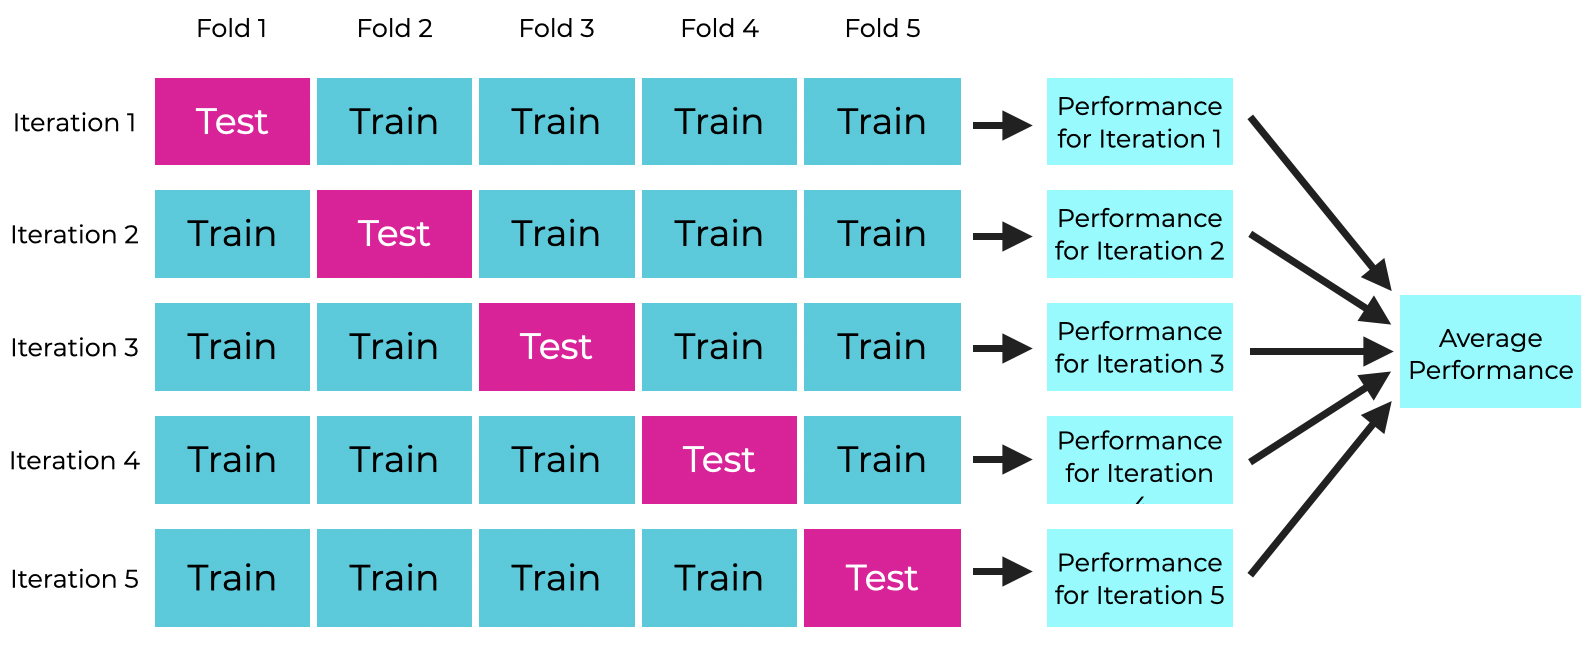

---

### Otimização de Hiperparâmetros
- **Definição**:
  - Hiperparâmetros não são aprendidos pelo modelo; são ajustados manualmente ou automaticamente.
  - Exemplo: Profundidade máxima de uma árvore de decisão, taxa de aprendizado de um modelo de rede neural.
  
- **Técnicas Comuns**:
  - **Grid Search**: Testa combinações exaustivas de valores.
  - **Random Search**: Testa combinações aleatórias.
  - **Bayesian Optimization**: Abordagem probabilística para encontrar configurações ideais.

---

### Observação
- A seleção de modelos e a otimização de hiperparâmetros são essenciais para o sucesso do aprendizado supervisionado.
- Técnicas como validação cruzada garantem que o modelo generalize bem para dados não vistos.
- A escolha cuidadosa de métricas e métodos de ajuste impacta diretamente a qualidade das predições.



## Cross-Validation no python

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# 1. Carregar o conjunto de dados Zoo
data = pd.read_csv("./aima-data/zoo.csv", sep=',')

# Separar as features (X) e a classe alvo (y)
X = data.drop(columns=['animal_name', 'type'], axis=1)
y = data['type']  


# 2. Configurar o modelo de Random Forest
model = RandomForestClassifier(
    n_estimators=100,  # Número de árvores na floresta
    criterion="gini",  # Critério de divisão (pode ser "gini" ou "entropy")
    max_depth=4,  # Profundidade máxima das árvores
    random_state=42
)

# 3. Configurar K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Avaliar o modelo com Cross-Validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Resultados
print(f"Acurácias por fold: {scores}")
print(f"Acurácia média: {scores.mean():.2f}")
print(f"Desvio padrão das acurácias: {scores.std():.2f}")


## Curva de Aprendizado

A **curva de aprendizado** é uma ferramenta poderosa para avaliar o desempenho de um modelo de aprendizado de máquina em função do tamanho do conjunto de dados. Ela ajuda a entender se o modelo sofre de **overfitting** (ajustando-se excessivamente aos dados de treinamento) ou **underfitting** (não capturando os padrões nos dados).

---

### O Que é uma Curva de Aprendizado?

Uma curva de aprendizado mostra como a **acurácia** (ou outra métrica) do modelo muda à medida que aumentamos o número de amostras no conjunto de dados de **treinamento** e testamos o modelo com um conjunto de dados fixo de **teste**.

#### Usos:
1. Identificar **overfitting**:
   - Quando o desempenho no treinamento é bom, mas o desempenho no teste é ruim.
2. Identificar **underfitting**:
   - Quando tanto o desempenho no treinamento quanto no teste são ruins.
3. Determinar se mais dados podem melhorar o modelo.

---

### Implementação de Curva de Aprendizado com Random Forest [com acurácia]



In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold

# 1. Carregar o conjunto de dados Zoo
data = pd.read_csv("./aima-data/zoo.csv", sep=',')

# Separar as features (X) e a classe alvo (y)
X = data.drop(columns=['animal_name', 'type'], axis=1)
y = data['type']  # Coluna alvo já numérica (1 a 7)

# 2. Criar o modelo de Random Forest
model = RandomForestClassifier(
    n_estimators=100,  # Número de árvores na floresta
    criterion="gini",  # Critério de divisão
    max_depth=6,       # Profundidade máxima das árvores
    random_state=42
)

# 3. Gerar a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10),  # Usar frações do conjunto de dados (10%, 20%, ..., 100%)
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

# 4. Calcular a média e o desvio padrão das pontuações
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 5. Plotar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color='green', label="Teste")

# Adicionar a faixa de desvio padrão
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Configurar o gráfico
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.grid()
plt.show()#### Código


### Explicação do Código

#### 1. **`learning_curve`**
- **`train_sizes`**: Define os tamanhos do conjunto de treinamento como frações do total.
- **`train_scores` e `test_scores`**: Armazenam as pontuações de acurácia para cada tamanho do conjunto de treinamento.

#### 2. **Média e Desvio Padrão**
- Calculamos a média e o desvio padrão das pontuações para suavizar as curvas.

#### 3. **Gráfico**
- **Linha Azul**: Representa o desempenho do modelo no treinamento.
- **Linha Verde**: Representa o desempenho no teste.
- **Sombras**: Mostram o desvio padrão (variabilidade).

---

### Saída Esperada

#### Gráfico da Curva de Aprendizado
O gráfico terá duas curvas:
1. **Acurácia no Conjunto de Treinamento**:
   - Geralmente começa alta (com poucos dados) e pode decrescer à medida que mais dados são usados.
2. **Acurácia no Conjunto de Teste**:
   - Começa baixa e aumenta à medida que mais dados são usados, até se estabilizar.

---

### Análise

1. **Overfitting**:
   - A curva de treinamento está alta, mas a curva de teste está significativamente mais baixa e não melhora com mais dados.
   - Solução: Ajustar os hiperparâmetros do modelo (exemplo: `max_depth`, `min_samples_split`).

2. **Underfitting**:
   - Ambas as curvas (treinamento e teste) têm baixa acurácia e não convergem.
   - Solução: Aumentar a complexidade do modelo ou incluir mais features.

3. **Modelo Adequado**:
   - As curvas de treinamento e teste convergem e têm valores altos de acurácia.

---

### Implementação de Curva de Aprendizado com Random Forest [com taxa de erro]


In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold

# 1. Carregar o conjunto de dados Zoo
data = pd.read_csv("./aima-data/zoo.csv", sep=',')

# Separar as features (X) e a classe alvo (y)
X = data.drop(columns=['animal_name', 'type'], axis=1)
y = data['type']  # Coluna alvo já numérica (1 a 7)

# 2. Criar o modelo de Random Forest
model = RandomForestClassifier(
    n_estimators=100,  # Número de árvores na floresta
    criterion="gini",  # Critério de divisão
    max_depth=6,       # Profundidade máxima das árvores
    random_state=42
)

# 3. Gerar a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10),  # Usar frações do conjunto de dados (10%, 20%, ..., 100%)
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

# 4. Calcular a taxa de erro
train_error = 1 - np.mean(train_scores, axis=1)
test_error = 1 - np.mean(test_scores, axis=1)

# 5. Plotar a curva de aprendizado com taxa de erro
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_error, 'o-', color='blue', label="Erro no Treinamento")
plt.plot(train_sizes, test_error, 'o-', color='green', label="Erro no Teste")

# Configurar o gráfico
plt.title("Curva de Aprendizado (Taxa de Erro)")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Taxa de Erro")
plt.legend(loc="best")
plt.grid()
plt.show()


## Grid Search

**Grid Search** é uma técnica para encontrar os melhores hiperparâmetros para um modelo de aprendizado de máquina. Ela realiza uma busca exaustiva testando combinações específicas de valores fornecidos para cada hiperparâmetro e avalia o modelo com validação cruzada em cada combinação.

Abaixo está uma explicação detalhada e uma implementação prática de **Grid Search** usando o dataset **Zoo** com o modelo **Random Forest**.

---

Grid Search avalia todas as combinações possíveis de um conjunto de valores pré-definidos para os hiperparâmetros. O processo é o seguinte:
1. Escolha os hiperparâmetros a serem ajustados e os valores possíveis para cada um.
2. Teste cada combinação de valores.
3. Use validação cruzada para avaliar a combinação em termos de uma métrica, como **acurácia**.
4. Retorne a melhor combinação de valores e re-treine o modelo com ela.

---

### Implementação de Grid Search com Random Forest

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# 1. Carregar o conjunto de dados Zoo
data = pd.read_csv("./aima-data/zoo.csv", sep=',')

# Separar as features (X) e a classe alvo (y)
X = data.drop(columns=['animal_name', 'type'], axis=1)
y = data['type']  


# 2. Configurar os hiperparâmetros para o Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árvores na floresta
    'max_depth': [4, 6, 8],          # Profundidade máxima das árvores
    'criterion': ['gini', 'entropy'] # Critério de divisão
}

# 3. Configurar o modelo e a validação cruzada
model = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Configurar o Grid Search
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=cv, 
    n_jobs=-1,  # Usa todos os núcleos disponíveis
    verbose=1
)

# 5. Executar o Grid Search
grid_search.fit(X, y)

# 6. Resultados
print("Melhores Hiperparâmetros:", grid_search.best_params_)
print(f"Acurácia com os melhores parâmetros: {grid_search.best_score_:.2f}")

# 7. Re-treinar o modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_

# Fazer previsões no conjunto completo
y_pred = best_model.predict(X)

# Exibir o relatório de classificação
print("\nRelatório de Classificação com o Melhor Modelo:")
print(classification_report(y, y_pred,))

### Benefícios de Usar Grid Search
1. **Exploração Automática**:
   - Testa automaticamente todas as combinações possíveis de hiperparâmetros fornecidos.
2. **Validação Robusta**:
   - Usa validação cruzada para garantir uma estimativa confiável do desempenho.
3. **Melhor Desempenho**:
   - Garante que o modelo é ajustado com os melhores hiperparâmetros possíveis para o problema.

## NAIVE BAYES LEARNER

### Visão Geral

#### Teoria das Probabilidades

O algoritmo **Naive Bayes** é um classificador probabilístico, que faz uso do [Teorema de Bayes](https://en.wikipedia.org/wiki/Bayes%27_theorem). O teorema afirma que a probabilidade condicional de **A** dado **B** é igual à probabilidade condicional de **B** dado **A** multiplicada pela probabilidade de **A**, dividida pela probabilidade de **B**.

$$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$$

A partir da Teoria das Probabilidades, temos a **Regra da Multiplicação**: se os eventos *X* forem independentes, a seguinte relação é verdadeira:

$$P(X_{1} \cap X_{2} \cap ... \cap X_{n}) = P(X_{1})*P(X_{2})*...*P(X_{n})$$

Para probabilidades condicionais, isso se torna:

$$P(X_{1}, X_{2}, ..., X_{n}|Y) = P(X_{1}|Y)*P(X_{2}|Y)*...*P(X_{n}|Y)$$

#### Classificando um Item

Como podemos usar os conceitos acima para classificar um item?

Temos um conjunto de dados com um conjunto de classes (**C**) e queremos classificar um item com um conjunto de características (**F**). Essencialmente, queremos prever a classe de um item com base em suas características.

Para uma classe específica (**Class**), calculamos a probabilidade condicional considerando as características do item:

$$P(Class|F) = \dfrac{P(F|Class)*P(Class)}{P(F)}$$

Fazemos isso para todas as classes e escolhemos aquela com a maior probabilidade. Essa será a classe na qual o item será classificado.

As características, no entanto, são representadas por um vetor com muitos elementos. Precisamos quebrar as probabilidades usando a **regra da multiplicação**. Assim, a equação acima torna-se:

$$P(Class|F) = \dfrac{P(Class)*P(F_{1}|Class)*P(F_{2}|Class)*...*P(F_{n}|Class)}{P(F_{1})*P(F_{2})*...*P(F_{n})}$$

O cálculo da probabilidade condicional depende então dos seguintes elementos:

**a)** A probabilidade de **Class** no conjunto de dados.

**b)** A probabilidade condicional de cada característica ocorrer em um item classificado como **Class**.

**c)** As probabilidades de cada característica individual.

---

#### Como Calcular Cada Elemento

- **a)** A probabilidade de **Class**:
  - Contamos quantas vezes **Class** aparece no conjunto de dados (ou seja, quantos itens estão classificados em uma determinada classe).

- **b)** A probabilidade condicional de cada característica:
  - Para valores de características **discretos** (como 'Azul', '3', 'Alto'), contamos quantas vezes o valor da característica ocorre em itens de cada classe.
  - Para valores de características **contínuos**, utilizamos uma função de distribuição para calcular a probabilidade dos valores para uma classe e característica específicas:
    - Se conhecemos a função de distribuição do conjunto de dados, utilizamos essa função para calcular as probabilidades.
    - Caso contrário, assumimos que os dados seguem uma distribuição normal (Gaussiana). Essa suposição é válida graças ao [Teorema Central do Limite](https://en.wikipedia.org/wiki/Central_limit_theorem), que demonstra que qualquer distribuição tende à Gaussiana conforme o tamanho da população aumenta.

> **Nota**: Usar o método discreto para valores contínuos pode ser problemático. Por exemplo:
> - Se temos os valores `5.0` e `5.1`, o método discreto os trata como valores completamente diferentes, apesar de serem muito próximos.
> - Se estivermos tentando classificar um item com uma característica de valor `5.15`, e esse valor não aparecer no conjunto de treinamento, sua probabilidade será considerada **0**, o que pode levar a uma classificação incorreta. O método contínuo, embora mais complexo, é geralmente mais preciso e útil.

- **c)** As probabilidades de cada característica individual:
  - Para valores **discretos**, contamos quantas vezes eles aparecem no conjunto de dados.
  - Para valores **contínuos**, calcular essas probabilidades diretamente é impraticável, pois pequenas diferenças (como `1.7 metros` vs. `1.700001 metros`) podem ser tratadas como valores distintos.

---

#### Simplificação: Eliminar **P(F)**

Ao reconsiderar o cálculo de **P(F)** no contexto da classificação, percebemos que ele é o mesmo para todas as classes:

$$\dfrac{P(F|A)*P(A)}{P(F)} \text{ vs. } \dfrac{P(F|B)*P(B)}{P(F)}$$

O termo **P(F)** não depende de uma classe específica, sendo constante para todas as combinações de classes. Portanto, **não precisamos calcular** **P(F)**. 

Com isso, podemos simplificar a classificação para comparar diretamente:

$$P(F|Class)*P(Class)$$

Isso reduz a complexidade do cálculo e nos permite focar apenas em **P(Class)** e **P(F|Class)**.

#### Conclusão

Classificar um item em uma classe torna-se, então, uma questão de calcular as probabilidades condicionais dos valores das características e as probabilidades das classes. Isso é algo altamente desejável e computacionalmente eficiente.

Lembre-se, no entanto, que tudo isso é válido porque assumimos que as características são independentes. Na maioria dos casos do mundo real, isso não é verdade. Mas isso é um problema aqui? Não se preocupe, pois o algoritmo é muito eficiente mesmo com essa suposição. É por isso que o algoritmo é chamado de **Classificador de Bayes Ingênuo (Naive Bayes Classifier)**. Assumimos (de forma "ingênua") que as características são independentes para simplificar os cálculos.

### Implementação


In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar o conjunto de dados Iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Classes

# Mapear os nomes das classes
target_names = data.target_names

# 2. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Criar e treinar o modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# 5. Avaliar o modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 6. Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred,normalize='true')*100

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,  fmt='.1f', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
# Adicionar o símbolo de %
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(
            j + 0.5, i + 0.5, f"{conf_matrix[i, j]:.1f}%", 
            ha="center", va="center", color="black"
        )
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar o conjunto de dados Zoo
data = pd.read_csv("./aima-data/zoo.csv", sep=',')

# Separar as features (X) e a classe alvo (y)
X = data.drop(columns=['animal_name', 'type'], axis=1)
y = data['type']  # Coluna alvo já numérica (1 a 7)

# Nomes das classes correspondentes a cada valor de "type"
class_names = [
    "amphibian", "bird",  "fish",  "insect","mammal", "reptile","shellfish"
]

# 2. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Criar e treinar o modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Fazer previsões
y_pred = model.predict(X_test)

# 5. Avaliar o modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred,))

# 6. Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.show()


## PERCEPTRON CLASSIFIER

### Visão Geral

O Perceptron é um classificador linear. Ele funciona de maneira semelhante a uma rede neural sem camadas ocultas (apenas entrada e saída). Primeiro, ele treina seus pesos com base em um conjunto de dados e, em seguida, pode classificar um novo item passando-o pela rede.

Sua camada de entrada consiste nas características do item, enquanto a camada de saída é composta por nós (também chamados de neurônios). Cada nó na camada de saída possui *n* sinapses (uma para cada característica do item), cada uma com seu próprio peso. Em seguida, os nós calculam o produto escalar entre as características do item e os pesos das sinapses. Esses valores passam então por uma função de ativação (geralmente uma sigmoide). Finalmente, escolhemos o maior dos valores e retornamos o índice correspondente.

Observe que, em problemas de classificação, cada nó representa uma classe. A classificação final é a classe/nó com o maior valor de saída.

Abaixo, você pode ver um único nó/neurônio na camada de saída. Com *f* denotamos as características do item, com *w* os pesos das sinapses. Dentro do nó, temos o produto escalar e a função de ativação, *g*.

![perceptron](images/perceptron.png)

### Implementação


In [ ]:
# Importar bibliotecas
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Carregar o conjunto de dados Zoo
data = pd.read_csv("./aima-data/zoo.csv", sep=',')

# Separar as features (X) e a classe alvo (y)
X = data.drop(columns=['animal_name', 'type'], axis=1)
y = data['type']  # Coluna alvo já numérica (1 a 7)

# 2. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo Perceptron
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# Treinar o modelo
perceptron.fit(X_train, y_train)

# Fazer previsões
y_pred = perceptron.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Observe que o Perceptron é uma rede neural de uma única camada, sem camadas ocultas.

A função `predict` passa a entrada/exemplo pela rede, calculando o produto escalar entre a entrada e os pesos de cada nó, e retorna a classe correspondente ao maior produto escalar.

## ENSEMBLE LEARNER

### Visão Geral

O *Ensemble Learning* melhora o desempenho do modelo combinando vários *learners*. Ele aprimora a estabilidade e o poder preditivo do modelo. Os métodos de ensemble são meta-algoritmos que combinam várias técnicas de aprendizado de máquina em um único modelo preditivo, com o objetivo de reduzir a variância, o viés ou melhorar as previsões.  

![ensemble_learner.jpg](images/ensemble_learner.jpg)

Algumas técnicas de *Ensemble Learning* comumente utilizadas são:

1. **Bagging**: O *Bagging* tenta implementar aprendizes semelhantes em pequenas populações amostrais e, em seguida, calcula a média de todas as previsões. Ele ajuda a reduzir o erro de variância.

2. **Boosting**: O *Boosting* é uma técnica iterativa que ajusta o peso de uma observação com base na última classificação. Se uma observação foi classificada incorretamente, tenta-se aumentar o peso dessa observação e vice-versa. Ele ajuda a reduzir o erro de viés.

3. **Stacking**: O *Stacking* é uma maneira interessante de combinar modelos. Aqui, usamos um aprendiz para combinar as saídas de diferentes aprendizes. Dependendo dos aprendizes que utilizamos, pode ajudar a reduzir o viés ou a variância.

### Implementação

Abaixo está a implementação de um *Ensemble Learner*.


### 1. **Bagging (Bootstrap Aggregating)**
O Bagging envolve treinar vários modelos independentes (geralmente do mesmo tipo) em diferentes subconjuntos dos dados de treino e, em seguida, combinar suas previsões (por exemplo, por votação ou média).
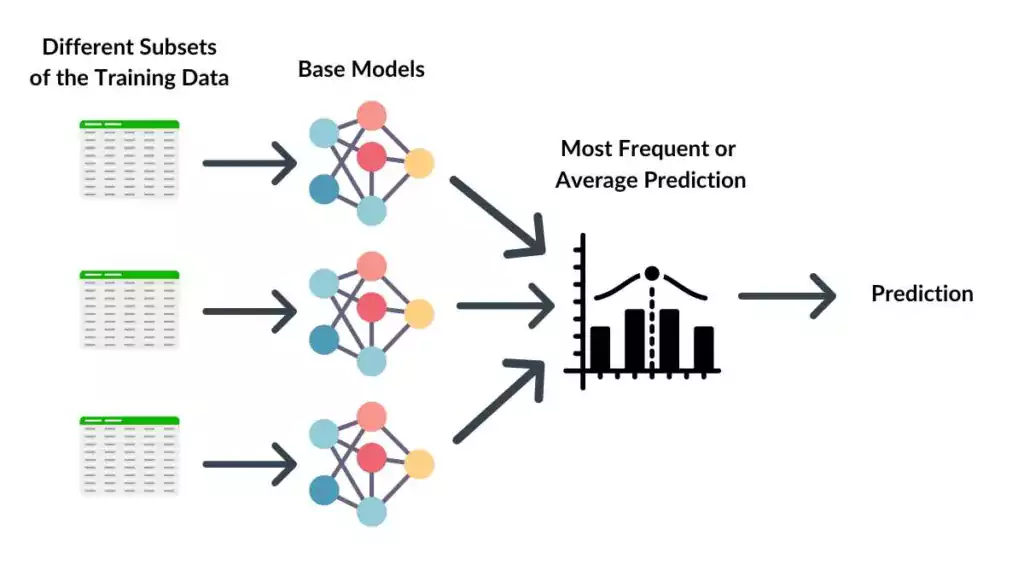

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar dataset
data = pd.read_csv("./aima-data/zoo.csv", sep=',')

# Separar as features (X) e a classe alvo (y)
X = data.drop(columns=['animal_name', 'type'], axis=1)
y = data['type']  # Coluna alvo já numérica (1 a 7)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar um modelo base (árvore de decisão)
base_model = DecisionTreeClassifier()

# Criar o ensemble usando Bagging
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Treinar o modelo
bagging_model.fit(X_train, y_train)

# Fazer previsões
y_pred = bagging_model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do BaggingClassifier: {accuracy:.2f}")

### 2. **Boosting**
O Boosting treina modelos sequencialmente, onde cada modelo tenta corrigir os erros do modelo anterior. Um exemplo popular é o **AdaBoost**.
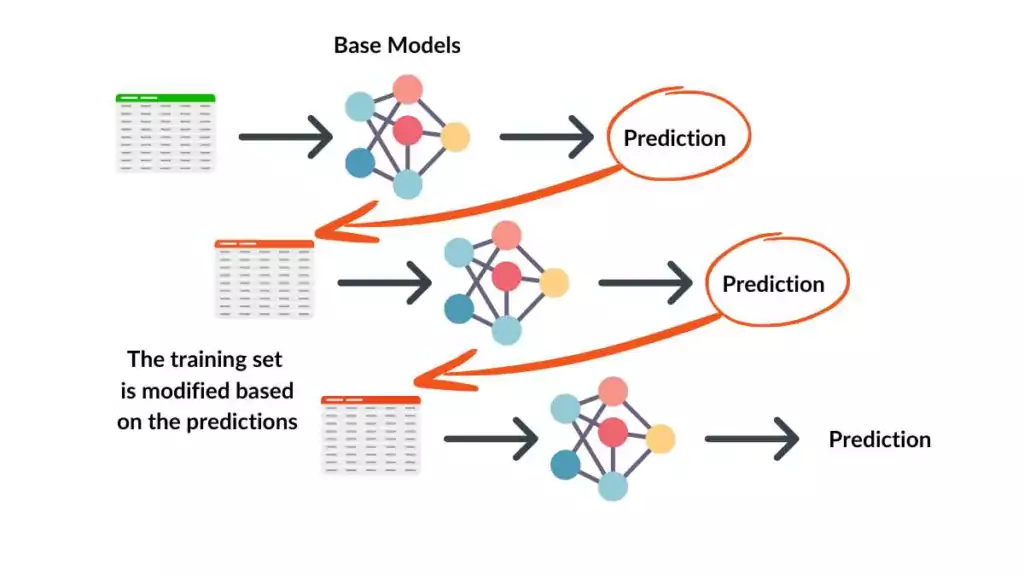

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar dataset
data = pd.read_csv("./aima-data/zoo.csv", sep=',')

# Separar as features (X) e a classe alvo (y)
X = data.drop(columns=['animal_name', 'type'], axis=1)
y = data['type']  # Coluna alvo já numérica (1 a 7)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar um modelo base (árvore de decisão)
base_model = DecisionTreeClassifier(max_depth=1)

# Criar o ensemble usando AdaBoost
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Treinar o modelo
adaboost_model.fit(X_train, y_train)

# Fazer previsões
y_pred = adaboost_model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do AdaBoostClassifier: {accuracy:.2f}")

### 3. **Stacking**
O Stacking combina as previsões de vários modelos usando um **meta-modelo** (um modelo que aprende a combinar as previsões dos modelos base).

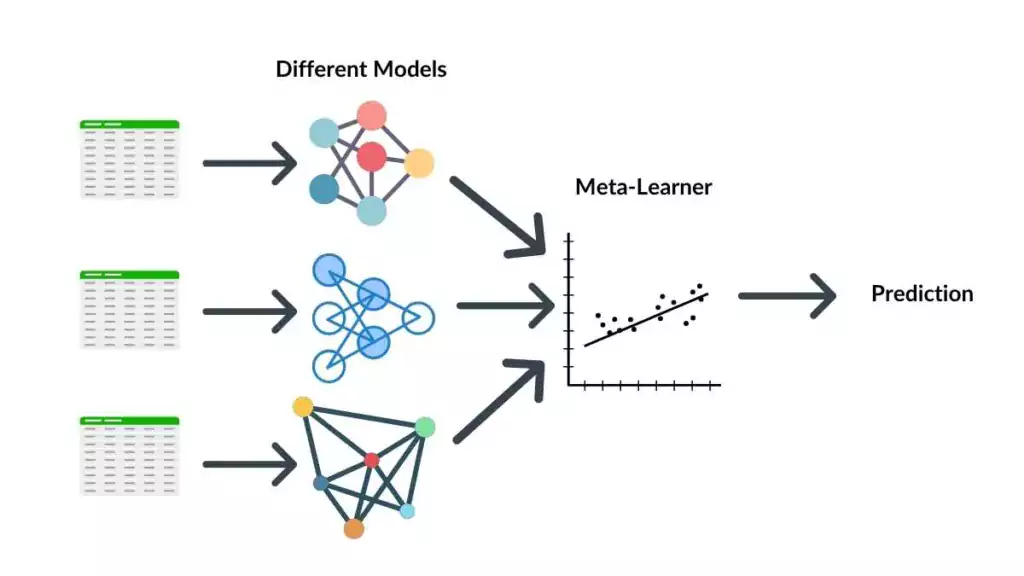

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar dataset
data = pd.read_csv("./aima-data/zoo.csv", sep=',')

# Separar as features (X) e a classe alvo (y)
X = data.drop(columns=['animal_name', 'type'], axis=1)
y = data['type']  # Coluna alvo já numérica (1 a 7)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar modelos base
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Criar o meta-modelo
meta_model = LogisticRegression()

# Criar o ensemble usando StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Treinar o modelo
stacking_model.fit(X_train, y_train)

# Fazer previsões
y_pred = stacking_model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do StackingClassifier: {accuracy:.2f}")

### Contexto de Regressão

In [ ]:
import pandas as pd
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
df = pd.read_csv('./data/sao-paulo-properties-april-2019.csv')

# Selecionar as colunas relevantes
features = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New']
target = 'Price'

# Remover linhas com valores faltantes
df = df.dropna(subset=features + [target])

# Separar features e target
X = df[features]
y = df[target]

# Converter variáveis categóricas em dummy/indicator variables
X = pd.get_dummies(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (importante para SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar modelos base
base_models = [
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR())
]

# Criar o meta-modelo
meta_model = LinearRegression()

# Criar o ensemble usando StackingRegressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Treinar o modelo
stacking_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = stacking_model.predict(X_test_scaled)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

# Support Vector Machines (SVM)

O **Support Vector Machine (SVM)** é um algoritmo de aprendizado supervisionado amplamente utilizado para problemas de classificação e regressão. Ele é particularmente eficaz em conjuntos de dados de alta dimensionalidade e é conhecido por sua capacidade de encontrar limites de decisão ótimos entre classes.

## 1. O que é SVM?

O SVM é um algoritmo que encontra um **hiperplano** ótimo para separar dados em classes. O objetivo é maximizar a **margem** entre as classes, ou seja, a distância entre o hiperplano e os pontos de dados mais próximos de cada classe (chamados de **vetores de suporte**).

![SVM Hyperplane](https://www.saedsayad.com/images/SVM_optimize.png)
*Figura 1: Hiperplano ótimo e vetores de suporte em um SVM.*

## 2. Como o SVM funciona?

### 2.1 Separação Linear
Em um caso linearmente separável, o SVM encontra um hiperplano que divide os dados em duas classes com a maior margem possível. A margem é definida pela distância entre o hiperplano e os vetores de suporte.


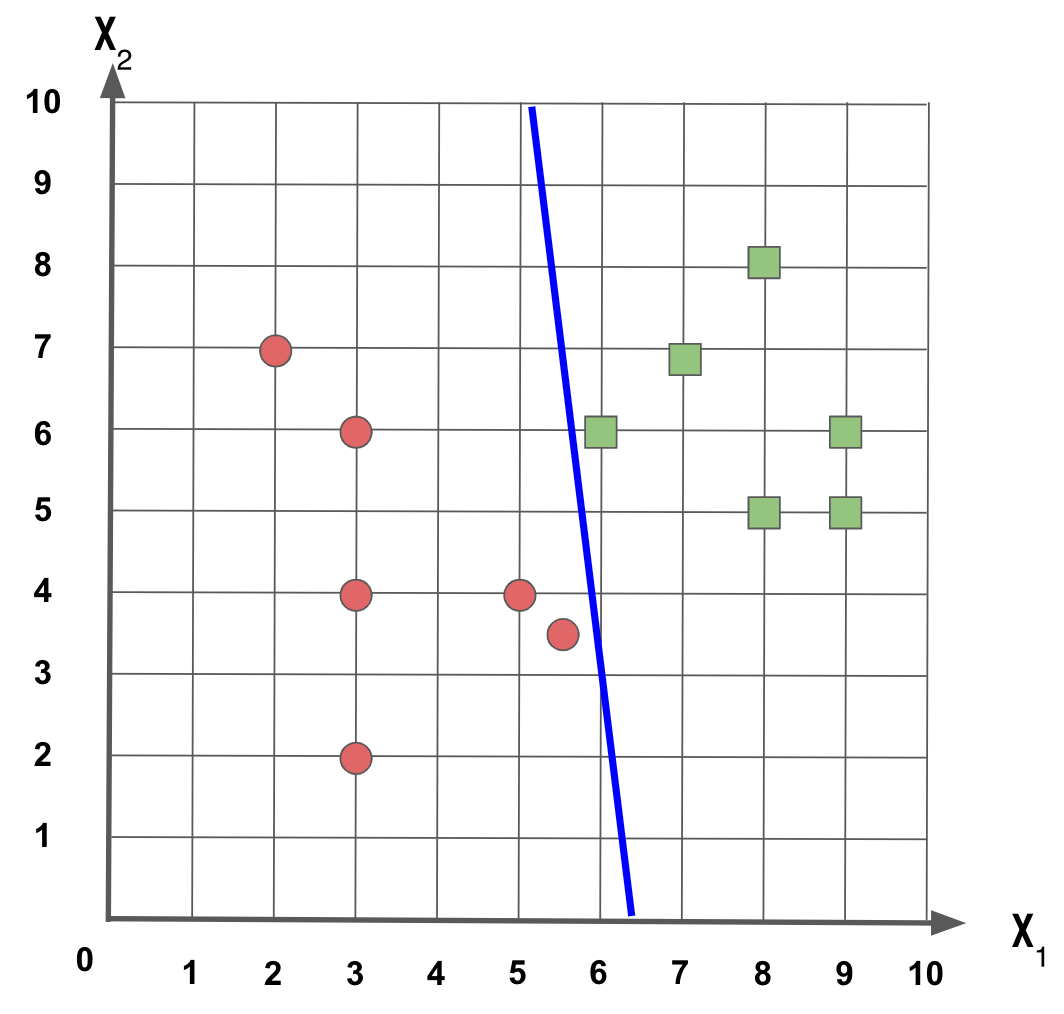

*Figura 2: Separação linear de dados usando SVM.*

### 2.2 Separação Não Linear
Quando os dados não são linearmente separáveis, o SVM usa uma técnica chamada **kernel trick** para mapear os dados para um espaço de maior dimensionalidade, onde eles podem ser separados por um hiperplano.

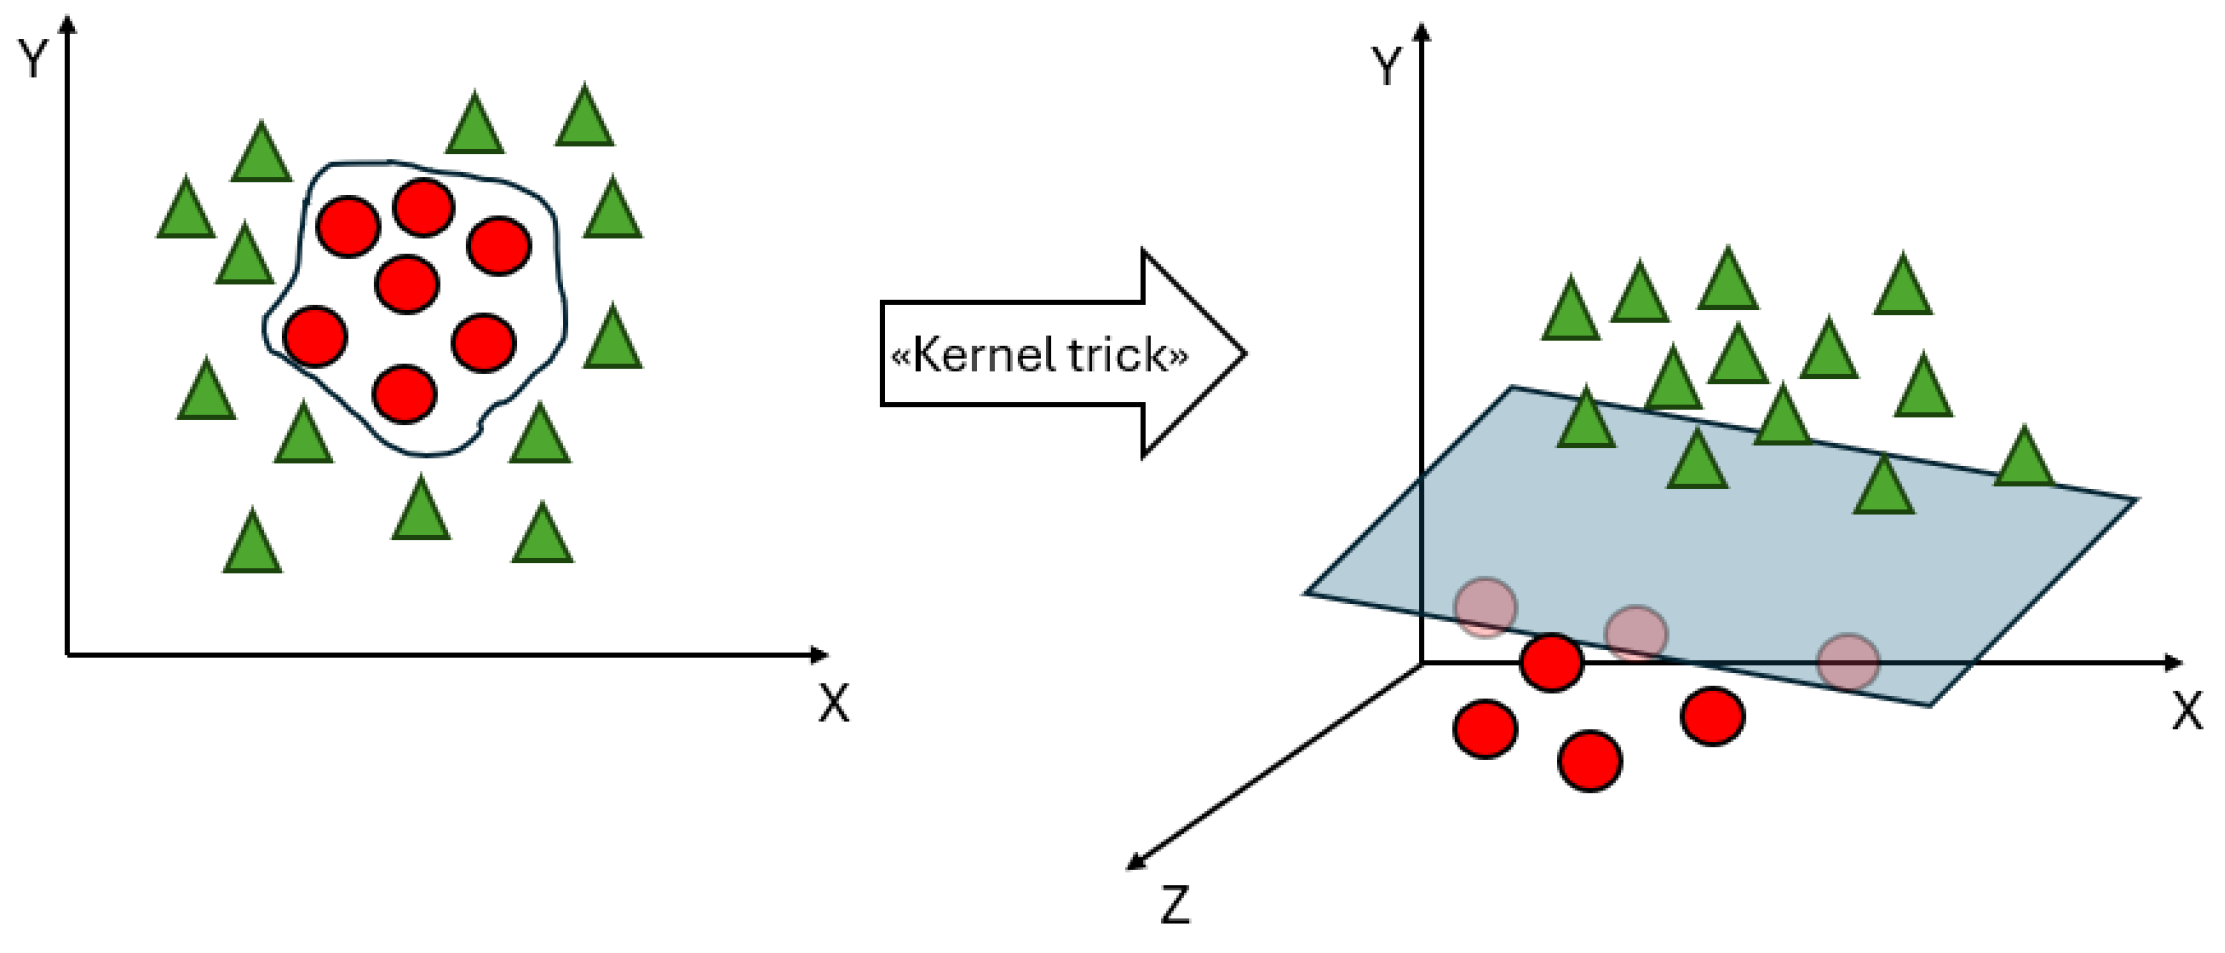

*Figura 3: Uso de kernel para separação não linear.*

### 2.3 Kernel Trick
O **kernel trick** permite que o SVM opere em um espaço de características transformado sem calcular explicitamente as coordenadas dos dados nesse espaço. Alguns kernels comuns incluem:
- **Linear**: $ K(x, y) = x^T y $
- **Polinomial**: $ K(x, y) = (x^T y + c)^d $
- **RBF (Radial Basis Function)**: $ K(x, y) = \exp(-\gamma \|x - y\|^2) $

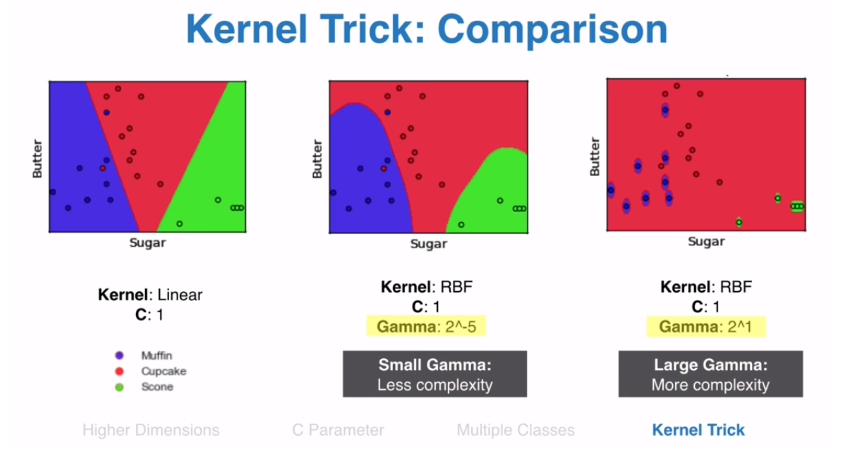

*Figura 4: Ilustração do kernel trick em SVM.*

## 3. Vantagens do SVM

- **Eficaz em espaços de alta dimensionalidade**: O SVM funciona bem mesmo quando o número de dimensões é maior que o número de amostras.
- **Versátil**: Pode ser usado para classificação e regressão.
- **Resistente a overfitting**: A maximização da margem ajuda a evitar overfitting, especialmente em conjuntos de dados de alta dimensionalidade.

## 4. Desvantagens do SVM

- **Escalonamento de dados**: O SVM é sensível à escala dos dados, então a normalização é importante.
- **Complexidade computacional**: Para grandes conjuntos de dados, o treinamento pode ser lento.
- **Escolha do kernel**: A seleção do kernel e a configuração de seus parâmetros podem ser desafiadoras.

## 5. Aplicações do SVM

O SVM é amplamente utilizado em diversas áreas, incluindo:
- **Reconhecimento de imagens**: Classificação de imagens em categorias.
- **Bioinformática**: Classificação de proteínas e genes.
- **Processamento de linguagem natural**: Classificação de texto e análise de sentimentos.




## 6. Exemplo de Código em Python


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usar apenas as duas primeiras características para visualização
y = iris.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Plotar as regiões de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Regiões de Decisão do SVM (Multiclasse)')
plt.show()

# Fazer previsões
y_pred = svm_model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do SVM (Multiclasse): {accuracy:.2f}")


### Saída Esperada:
O código treina um SVM com kernel linear no dataset Iris e plota o hiperplano de decisão.

![SVM Decision Boundary](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)
*Figura 5: Hiperplano de decisão gerado pelo SVM no dataset Iris.*

## 7. Conclusão

O SVM é uma ferramenta poderosa para problemas de classificação e regressão, especialmente em conjuntos de dados complexos e de alta dimensionalidade. Com a escolha adequada do kernel e a configuração dos parâmetros, o SVM pode alcançar excelentes resultados em uma variedade de aplicações.

## SVM para Regressão

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Carregar o dataset
df = pd.read_csv('./data/sao-paulo-properties-april-2019.csv')

# 2. Selecionar as colunas relevantes
features = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New']
target = 'Price'

# 3. Remover linhas com valores faltantes
df = df.dropna(subset=features + [target])

# 4. Separar features e target
X = df[features]
y = df[target]

# 5. Converter variáveis categóricas em dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)  # drop_first para evitar multicolinearidade

# 6. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Normalizar os dados (importante para SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Criar e treinar o modelo SVR
svr_model = SVR(kernel='linear')  # Usando kernel RBF (Radial Basis Function)
svr_model.fit(X_train_scaled, y_train)

# 9. Fazer previsões
y_pred = svr_model.predict(X_test_scaled)

# 10. Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

# Aprendizado Não Supervisionado

# Exemplo Prático de Clustering com Python

Neste exemplo, aplicaremos o algoritmo K-Means ao conjunto de dados Wine Dataset, disponível na biblioteca `scikit-learn`.

---


#### Passo 1: Importar Bibliotecas e Carregar os Dados

Primeiro, vamos importar as bibliotecas necessárias e carregar o conjunto de dados Wine.

In [ ]:
## 1. Importando as Bibliotecas e o Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carregar o conjunto de dados Wine
wine = load_wine()
X = wine.data  # Características dos vinhos
y = wine.target  # Rótulos das classes (não usados no clustering)
feature_names = wine.feature_names  # Nomes das características

# Exibir informações sobre o conjunto de dados
print("Número de amostras:", X.shape[0])
print("Número de características:", X.shape[1])
print("Nomes das características:", feature_names)

#### Passo 2: Pré-processamento dos Dados

Antes de aplicar o K-Means, é importante normalizar os dados para garantir que todas as características tenham a mesma escala.

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exibir as primeiras 5 amostras normalizadas
print("Dados normalizados (primeiras 5 amostras):")
print(X_scaled[:5])




#### Passo 3: Aplicar o Algoritmo K-Means

Vamos aplicar o K-Means para agrupar os vinhos em 3 clusters (já que sabemos que existem 3 classes no conjunto de dados).



In [ ]:
# Aplicar K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Obter os rótulos dos clusters
labels = kmeans.labels_

# Exibir os rótulos dos clusters
print("Rótulos dos clusters:", labels)

#### Passo 4: Visualizar os Clusters

Para visualizar os clusters, vamos reduzir a dimensionalidade dos dados usando **PCA** (Principal Component Analysis) e plotar os resultados em um gráfico 2D.


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotar os clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Clustering de Vinhos com K-Means (2 Componentes Principais)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()


#### Passo 5: Escolha do Número de Clusters (Método do Cotovelo)

O **método do cotovelo** é uma técnica comumente usada para determinar o número ideal de clusters \( k \) em algoritmos de agrupamento como o **K-Means**. Ele baseia-se na análise da **inércia** do modelo, que é a soma das distâncias quadradas entre os pontos de um cluster e seu respectivo centróide. Aqui está uma explicação detalhada:

---

### Como Funciona o Método do Cotovelo?

1. **Inércia e Número de Clusters:**
   - À medida que o número de clusters \( k \) aumenta, a inércia tende a diminuir porque os pontos estão sendo agrupados em clusters menores e mais próximos de seus centroides.
   - No entanto, após um certo ponto, o ganho na redução da inércia se torna marginal, indicando que o número de clusters adicional não está trazendo ganhos significativos em termos de agrupamento.

2. **Visualização Gráfica:**
   - Um gráfico é criado com:
     - O **número de clusters \( k \)** no eixo \( x \).
     - A **inércia** (ou soma das distâncias intracluster) no eixo \( y \).
   - O ponto em que a taxa de diminuição da inércia se estabiliza, formando um "cotovelo", é considerado o número ideal de clusters.

---

### Como Aplicar o Método do Cotovelo?

1. Rodar o algoritmo K-Means para diferentes valores de \( k \) (por exemplo, de 1 a 10).
2. Calcular a inércia para cada valor de \( k \).
3. Plotar os valores de inércia versus \( k \).
4. Identificar o "cotovelo" no gráfico, que representa o número ideal de clusters.

---

### Visualização

No gráfico abaixo, o cotovelo ocorre aproximadamente em \( k = 3 \):

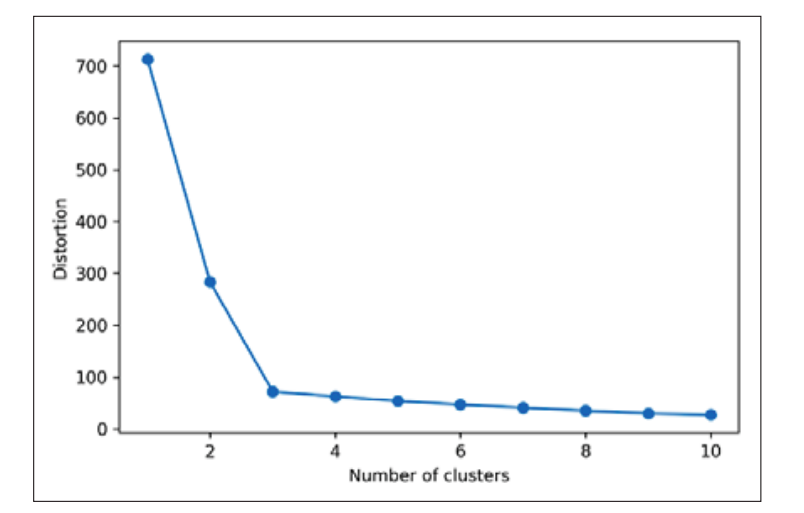

---

### Limitações

- Nem sempre o "cotovelo" é claramente visível, especialmente em datasets complexos.
- O método depende da interpretação visual, o que pode introduzir subjetividade.

Para resolver essas limitações, outros métodos como **Silhouette Score** ou o critério de informações como **AIC/BIC** também podem ser usados para complementar o método do cotovelo.

In [ ]:
# Método do cotovelo para escolher o número de clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Método do Cotovelo para Escolha do Número de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.xticks(k_values)
plt.show()